In [34]:
# Import Packages
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [45]:
# Define Anticident/Consequnece
Soil_Moisture = ctrl.Antecedent(universe=np.arange(0, 101), label="Soil_Moisture")
Temperature = ctrl.Antecedent(universe=np.arange(0, 51), label="Temperature")
Air_Humidity = ctrl.Antecedent(universe=np.arange(0, 101), label="Air_Humidity")
Watering_Amount = ctrl.Consequent(universe=np.arange(0, 501), label="Watering_Amount", defuzzify_method="centroid")

In [46]:
# Fuzzification
''' Form Used: Trapezoïdale '''
## Fuzzification FOR Soil_Moisture [V.Dry, Dry, Moist, Wet, V.Wet]
# - V.Dry: [0, 0, 20, 30] 
# - Dry:   [25, 35, 45, 55]
# - Moist: [50, 60, 70, 80]
# - Wet:   [75, 85, 95, 100]
# - V.Wet: [90, 95, 100, 100]
Soil_Moisture["Very_Dry"] = fuzz.trapmf(Soil_Moisture.universe, [0, 0, 20, 30])
Soil_Moisture["Dry"] = fuzz.trapmf(Soil_Moisture.universe, [25, 35, 45, 55])
Soil_Moisture["Moist"] = fuzz.trapmf(Soil_Moisture.universe, [50, 60, 70, 80])
Soil_Moisture["Wet"] = fuzz.trapmf(Soil_Moisture.universe, [75, 85, 95, 100])
Soil_Moisture["Very_Wet"] = fuzz.trapmf(Soil_Moisture.universe, [90, 95, 100, 100])
# Soil_Moisture.view()

## Fuzzification FOR Temperature [V.Cold, Cold, Normal, Hot, V.Hot]
# - V.Cold: [0, 0, 10, 15]
# - Cold:   [12, 18, 22, 26]
# - Normal: [24, 28, 32, 36]
# - Hot:    [34, 38, 42, 46]
# - V.Hot:  [44, 48, 50, 50]
Temperature["Very_Cold"] = fuzz.trapmf(Temperature.universe, [0, 0, 10, 15])
Temperature["Cold"] = fuzz.trapmf(Temperature.universe, [12, 18, 22, 26])
Temperature["Normal"] = fuzz.trapmf(Temperature.universe, [24, 28, 32, 36])
Temperature["Hot"] = fuzz.trapmf(Temperature.universe, [34, 38, 42, 46])
Temperature["Very_Hot"] = fuzz.trapmf(Temperature.universe, [44, 48, 50, 50])
# Temperature.view()

## Fuzzification FOR Air_Humidity [Low, Moderate, High]
# - Low:      [0, 0, 30, 45]
# - Moderate: [40, 50, 60, 70]
# - High:     [65, 80, 100, 100]
Air_Humidity["Low"] = fuzz.trapmf(Air_Humidity.universe, [0, 0, 30, 45])
Air_Humidity["Moderate"] = fuzz.trapmf(Air_Humidity.universe, [40, 50, 60, 70])
Air_Humidity["High"] = fuzz.trapmf(Air_Humidity.universe, [65, 80, 100, 100])
# Air_Humidity.view()


## Fuzzification FOR Watering_Amount [None, V.Short, Short, Medium, Long, V.Long]
# - None:    [0, 0, 0, 0]           (Pump stays OFF)
# - V.Short: [0, 20, 50, 80]        (~50ml)
# - Short:   [60, 100, 150, 200]    (~150ml)
# - Medium:  [180, 250, 300, 350]   (~280ml)
# - Medium-Long: [280, 330, 370, 420] (~300ml)
# - Long:    [320, 380, 420, 460]   (~400ml)
# - V.Long:  [440, 480, 500, 500]   (~500ml)
Watering_Amount["None"] = fuzz.trapmf(Watering_Amount.universe, [0, 0, 0, 0])
Watering_Amount["Very_Short"] = fuzz.trapmf(Watering_Amount.universe, [0, 20, 50, 80])
Watering_Amount["Short"] = fuzz.trapmf(Watering_Amount.universe, [60, 100, 150, 200])
Watering_Amount["Medium"] = fuzz.trapmf(Watering_Amount.universe, [180, 250, 300, 350])
Watering_Amount["Medium-Long"] = fuzz.trapmf(Watering_Amount.universe, [280, 330, 370, 420])
Watering_Amount["Long"] = fuzz.trapmf(Watering_Amount.universe, [320, 380, 420, 460])
Watering_Amount["Very_Long"] = fuzz.trapmf(Watering_Amount.universe, [440, 480, 500, 500])
# Watering_Amount.view()



In [48]:
# Rules
# Group 1: Soil is Very Dry
rule1 = ctrl.Rule(Soil_Moisture['Very_Dry'] & Temperature['Very_Cold'], Watering_Amount['Medium'])
rule2 = ctrl.Rule(Soil_Moisture['Very_Dry'] & Temperature['Cold'],   Watering_Amount['Long'])
rule3 = ctrl.Rule(Soil_Moisture['Very_Dry'] & Temperature['Normal'], Watering_Amount['Long'])
rule4 = ctrl.Rule(Soil_Moisture['Very_Dry'] & Temperature['Hot'],    Watering_Amount['Very_Long'])
rule5 = ctrl.Rule(Soil_Moisture['Very_Dry'] & Temperature['Very_Hot'],  Watering_Amount['Very_Long'])

# Group 2: Soil is Dry
rule6 = ctrl.Rule(Soil_Moisture['Dry'] & Temperature['Very_Cold'],   Watering_Amount['Short'])
rule7 = ctrl.Rule(Soil_Moisture['Dry'] & Temperature['Cold'],     Watering_Amount['Medium'])
rule8 = ctrl.Rule(Soil_Moisture['Dry'] & Temperature['Normal'],   Watering_Amount['Medium'])
rule9 = ctrl.Rule(Soil_Moisture['Dry'] & Temperature['Hot'],      Watering_Amount['Long'])
rule10 = ctrl.Rule(Soil_Moisture['Dry'] & Temperature['Very_Hot'],   Watering_Amount['Very_Long'])

# Group 3: Soil is Moist
rule11 = ctrl.Rule(Soil_Moisture['Moist'] & Temperature['Very_Cold'], Watering_Amount['Very_Short'])
rule12 = ctrl.Rule(Soil_Moisture['Moist'] & Temperature['Cold'],   Watering_Amount['Short'])
rule13 = ctrl.Rule(Soil_Moisture['Moist'] & Temperature['Normal'], Watering_Amount['Short'])
rule14 = ctrl.Rule(Soil_Moisture['Moist'] & Temperature['Hot'],    Watering_Amount['Medium'])
rule15 = ctrl.Rule(Soil_Moisture['Moist'] & Temperature['Very_Hot'],  Watering_Amount['Long'])

# Group 4: Soil is Wet
rule16 = ctrl.Rule(Soil_Moisture['Wet'] & Temperature['Very_Cold'],   Watering_Amount['None'])
rule17 = ctrl.Rule(Soil_Moisture['Wet'] & Temperature['Cold'],     Watering_Amount['None'])
rule18 = ctrl.Rule(Soil_Moisture['Wet'] & Temperature['Normal'],   Watering_Amount['Very_Short'])
rule19 = ctrl.Rule(Soil_Moisture['Wet'] & Temperature['Hot'],      Watering_Amount['Short'])
rule20 = ctrl.Rule(Soil_Moisture['Wet'] & Temperature['Very_Hot'],    Watering_Amount['Short'])

# Group 5: Soil is Very Wet (Safety Override)
rule21 = ctrl.Rule(Soil_Moisture['Very_Wet'], Watering_Amount['None']) 

# Group 6: Air Humidity Effect
# High humidity → reduce watering
rule22 = ctrl.Rule(Air_Humidity['High'] & Soil_Moisture['Dry'],  Watering_Amount['Short'])
rule23 = ctrl.Rule(Air_Humidity['High'] & Soil_Moisture['Moist'], Watering_Amount['None'])

# Low humidity → increase watering
rule24 = ctrl.Rule(Air_Humidity['Low'] & Soil_Moisture['Dry'],  Watering_Amount['Long'])
rule25 = ctrl.Rule(Air_Humidity['Low'] & Soil_Moisture['Very_Dry'], Watering_Amount['Very_Long'])


In [49]:
# Agregation
system_ctrl = ctrl.ControlSystem(rules=[rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

In [50]:
## Simulate Control System [Defuzzification ---> generate one number]
predictor_system = ctrl.ControlSystemSimulation(system_ctrl, clip_to_bounds=True)

Air_Humidity = 40, Temperature = 4, Soil_Moisture = 62 --> 37.87878787878789 ml


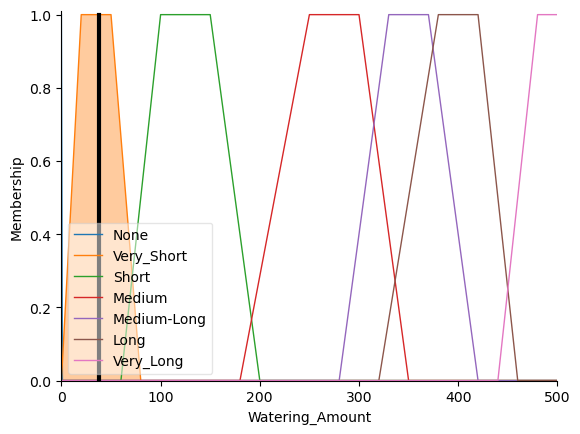

In [56]:
# Deffuzification [TEST]
air_humidity = np.random.randint(0, 101)
temperature = np.random.randint(0, 51)
soil_moisture = np.random.randint(0, 101)

predictor_system.input["Air_Humidity"] = air_humidity
predictor_system.input["Temperature"] = temperature
predictor_system.input["Soil_Moisture"] = soil_moisture

predictor_system.compute()
print(f"Air_Humidity = {air_humidity}, Temperature = {temperature}, Soil_Moisture = {soil_moisture} --> {predictor_system.output["Watering_Amount"]} ml")

Watering_Amount.view(sim=predictor_system)
